In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [4]:
image = mpimg.imread('test_images/solidWhiteRight.jpg')

In [18]:
#Color Selecetion

In [25]:
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image) #numpy array for image



In [10]:
#print(color_select)
red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]


In [11]:
thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])

In [12]:
color_select[thresholds] = [0,0,0]

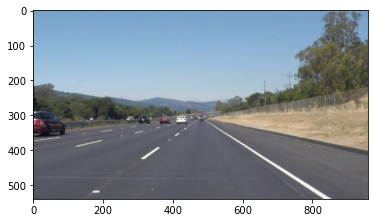

In [26]:
plt.imshow(image)

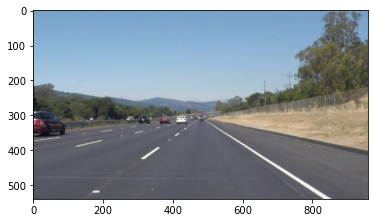

In [27]:
plt.imshow(color_select)

In [19]:
#Region Masking 
#look for lanes where we expect them to be

In [23]:
left_bottom = [100, 539]
right_bottom = [950, 539]
apex = [480, 290]

# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]),  1)

In [31]:
line_image = np.copy(image)

In [24]:
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

In [29]:
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

In [32]:
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [9, 255, 0]

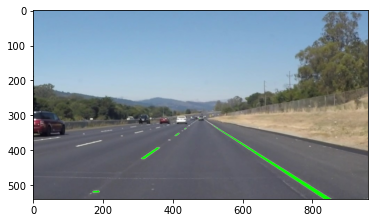

In [33]:
plt.imshow(line_image)